In [3]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from IPython.core.pylabtools import figsize

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from edward.models import Uniform, Bernoulli, Empirical, Normal

plt.style.use('ggplot')

/Users/laygr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
tf.reset_default_graph()
_ = tf.InteractiveSession()

In [6]:
N = 100
X = 35.0

p = Normal(loc=0.7, scale = 0.5, name = "freq_cheating")
probs = tf.ones(N) * p
true_answers = Bernoulli(probs = tf.ones(N) * p, name = "truths")

first_coin_flips = Bernoulli(probs = tf.ones(100) * 0.5, name = "first_flips")
second_coin_flips = Bernoulli(probs = tf.ones(100) * 0.5, name = "second_flips")

val = first_coin_flips*true_answers + (1 - first_coin_flips)*second_coin_flips

observed_proportion = tf.cast(tf.reduce_sum(val), tf.float32) / N

xx = Bernoulli(probs = tf.ones(N) * observed_proportion, name = "obs")
observations = tf.cast(tf.reduce_sum(val), tf.float32)
#observations = tf.reduce_sum(xx)
#observations = observed_proportion * N
#observations = Binomial(total_count=tf.constant(N), probs=observed_proportion)

In [7]:
T = 10000  # number of MC samples

qpi = tf.ones((T), dtype=tf.float32) * 0.1

qp  = Empirical(tf.get_variable("qp/params", initializer=qpi))


In [8]:
inference = ed.HMC({p:qp}, data={observations: tf.constant(X)})
inference.run()

10000/10000 [100%] ██████████████████████████████ Elapsed: 6s | Acceptance Rate: 0.984


In [9]:
qp_samples = qp.sample(1000).eval()

In [10]:
qp_samples.mean()

0.6759319

Text(0.5,0,'p value')

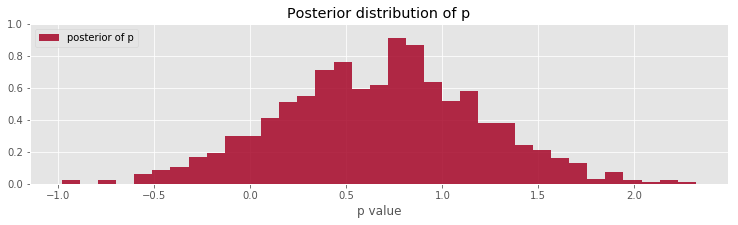

In [11]:
figsize(12.5, 10)

#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(qp_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label="posterior of p", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title("Posterior distribution of p")
#plt.xlim([15, 30])
plt.xlabel("p value")